# Testing myml

Start by importing the class object **mynet** from the python script **myml.py**.
Then import the mnist dataset, a set of 28x28 pixel handwritten numbers with labels.

In [1]:
import numpy as np
from myml import mynet
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

    
(x_train, y_traini),(x_test, y_testi) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(len(x_train[:, 0]), -1)
x_test = x_test.reshape(len(x_test[:, 0]), -1)
y_train = np.zeros((len(y_traini), 10), dtype='float')
for i in range(len(y_traini)):
    y_train[i, y_traini[i]] = 1
y_test = np.zeros((len(y_testi), 10), dtype='float')
for i in range(len(y_testi)):
    y_test[i, y_testi[i]] = 1

## Initialise the net

Create the neural network by passing the class object the number of input and output nodes.<br>
In this case I have also passed an activation function to replace the default sigmoid, this function must have an option to find the derivative.<br>
Finally, pass the data to the net to for training and test sets.

In [2]:
def linact(x, dif=False):
    if dif is False:
        x[x < 0] = 0
        return x
    else:
        x[x < 0] = 0
        x[x > 0] = 1
        return x

    
test = mynet(784, 10, activation=linact)
test.add_layers([15, 15])

test.give_data(x_train, y_train, datatype='train')
test.give_data(x_test, y_test, datatype='test')

## Train the network

Now train the network. The first argument is how many mini batches to split the training data into. The second, the number of times to train over the full data set. Finally, the third is a parameter that adjusts how fast the net learns.

In [3]:
test.training_montage(6000, 15, 0.1)

Before training achieved a grade of 0.0 with an average cost of 0.45055
Starting round 1/15
Round 1/15 complete! Achieved a grade of 68.91 with an average cost of 0.16514
Starting round 2/15
Round 2/15 complete! Achieved a grade of 81.39 with an average cost of 0.10184
Starting round 3/15
Round 3/15 complete! Achieved a grade of 82.51 with an average cost of 0.09676
Starting round 4/15
Round 4/15 complete! Achieved a grade of 82.91 with an average cost of 0.09419
Starting round 5/15
Round 5/15 complete! Achieved a grade of 83.92 with an average cost of 0.08818
Starting round 6/15
Round 6/15 complete! Achieved a grade of 84.06 with an average cost of 0.08761
Starting round 7/15
Round 7/15 complete! Achieved a grade of 84.28 with an average cost of 0.08574
Starting round 8/15
Round 8/15 complete! Achieved a grade of 83.96 with an average cost of 0.08873
Starting round 9/15
Round 9/15 complete! Achieved a grade of 84.42 with an average cost of 0.08422
Starting round 10/15
Round 10/15 comp

## Print some stuff

Print a random evaluation from the test set and compare to the label.<br>
Also, print the weights of the first layer, each titled with the bias then applied.

Test data index = 5609
Output = [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Label = [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]




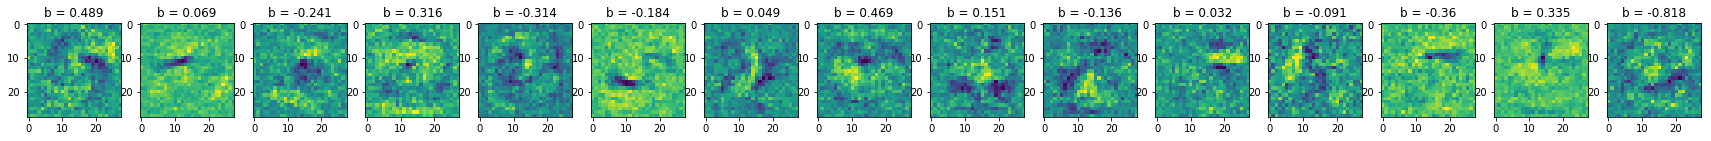

In [9]:
pick = int(np.random.rand(1)*len(test.testdata[0]))
print('Test data index = ' + str(pick))
print('Output = ' + str(np.round(test.evaluate(test.testdata[0][pick]), decimals=2)))
print('Label = ' + str(test.testdata[1][pick]) + '\n\n')

plt.figure(figsize=[30, 2])
for i in range(15):
    mapped = test.weights[0][i, :].reshape(28, 28)
    plt.subplot(1, 15, i+1)
    plt.title('b = ' + str(np.round(test.biases[0][i], decimals=3)))
    plt.imshow(mapped)